# Group project - DATA201


# By Oscar Toohey, Jamie Barnes, Seth Gunn, Bách Vũ Việt

In [17]:
# Install tidyverse, rvest and reshape
library(tidyverse)
library(rvest)
library(magrittr) # better handling of pipes
library(purrr) 

# load ggplot2
library(ggplot2)

## Tourism

In [26]:
tourism_df <- read_csv(file = "data/TourismStatNZ.csv")
tourism_df %>% glimpse()
tourism_df %>% problems()

Rows: 121 Columns: 3

-- Column specification --------------------------------------------------------
Delimiter: ","
chr (1): Month-Year


i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.



Rows: 121
Columns: 3
$ `Month-Year`          <chr> "Jun-11", "Jul-11", "Aug-11", "Sep-11", "Oct-11"~
$ Actual                <dbl> 131269, 176084, 175909, 219940, 215902, 230292, ~
$ `Seasonally adjusted` <dbl> 186800, 212580, 220580, 262350, 247820, 215640, ~


row,col,expected,actual,file
<int>,<int>,<chr>,<chr>,<chr>


In [29]:
# Scrapping do not work for StatNZ - no script
url_titles <- "https://www.stats.govt.nz/topics/tourism" # to get the url of the webpage where the scraping has started
article <- read_html(url_titles) # to read and parse the webpage into R (in html document)
article

tourism_list <- article %>%
    html_nodes("td")

tourism_list %>% glimpse() # to have a brief look at the actuall link of the html
length(tourism_list)

{html_document}
<html lang="en-NZ">
[1] <head profile="http://www.w3.org/2005/10/profile">\n<base href="https://w ...
[2] <body class="BlockPage" dir="ltr">\n    <!-- Google Tag Manager (noscript ...

 list()
 - attr(*, "class")= chr "xml_nodeset"


[1] 0

In [1]:
# install.packages("tidyverse")
# install.packages("visdat")
# install.packages("skimr")

In [2]:
library(tidyverse)
library(visdat)
library(skimr)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.5     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.0.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



Reading CSV files

In [3]:
gw_bookings_df <- read_csv(file = "data/DOC_great_walks_booking/use-of-public-conservation-land-great-walks-200517.csv")

Rows: 25098 Columns: 6

── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (5): great_walk, seasonality, hut_or_campsite, measure, date
dbl (1): count


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



Checking data

Rows: 25,098
Columns: 6
$ great_walk      <chr> "Abel Tasman Coast Track - Great Walk", "Abel Tasman C…
$ seasonality     <chr> "Year-round", "Year-round", "Year-round", "Year-round"…
$ hut_or_campsite <chr> "Akersten Bay Campsite", "Akersten Bay Campsite", "Ana…
$ measure         <chr> "BookedUnits", "Capacity", "BookedUnits", "Capacity", …
$ date            <chr> "1/10/2005", "1/10/2005", "1/10/2005", "1/10/2005", "1…
$ count           <dbl> 6, 180, 24, 336, 365, 3100, 425, 1054, 70, 840, 125, 1…
── Data Summary ────────────────────────
                           Values    
Name                       Piped data
Number of rows             25098     
Number of columns          6         
_______________________              
Column type frequency:               
  character                5         
  numeric                  1         
________________________             
Group variables            None      

── Variable type: character ──────────────────────────────────────────────

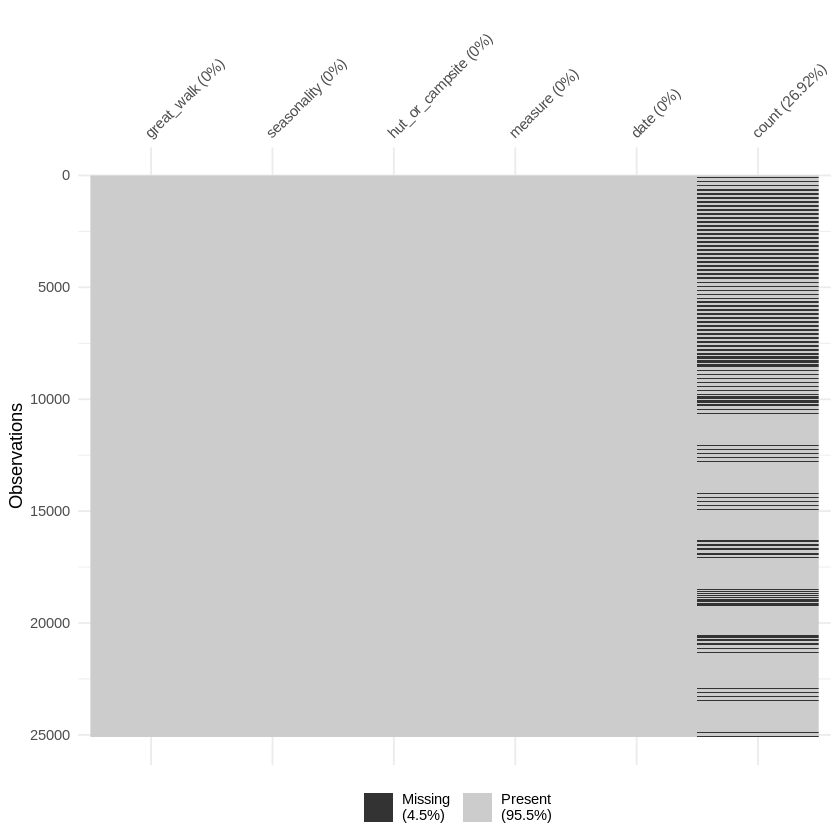

In [4]:
gw_bookings_df %>% glimpse()
gw_bookings_df %>% skim()
gw_bookings_df %>% vis_miss()

# Manipulating Data

_Widening the data_

Rows: 12,549
Columns: 7
$ great_walk      <chr> "Abel Tasman Coast Track - Great Walk", "Abel Tasman C…
$ seasonality     <chr> "Year-round", "Year-round", "Year-round", "Year-round"…
$ hut_or_campsite <chr> "Akersten Bay Campsite", "Akersten Bay Campsite", "Ake…
$ date            <chr> "1/01/2006", "1/01/2007", "1/01/2008", "1/01/2009", "1…
$ BookedUnits     <dbl> 73, 65, 70, 129, 106, 121, 101, 104, 96, 112, 150, 156…
$ Capacity        <dbl> 180, 180, 180, 180, 174, 174, 168, 174, 174, 162, 180,…
$ full_pcnt       <dbl> 40.555556, 36.111111, 38.888889, 71.666667, 60.919540,…
── Data Summary ────────────────────────
                           Values    
Name                       Piped data
Number of rows             12549     
Number of columns          7         
_______________________              
Column type frequency:               
  character                4         
  numeric                  3         
________________________             
Group variables            None  

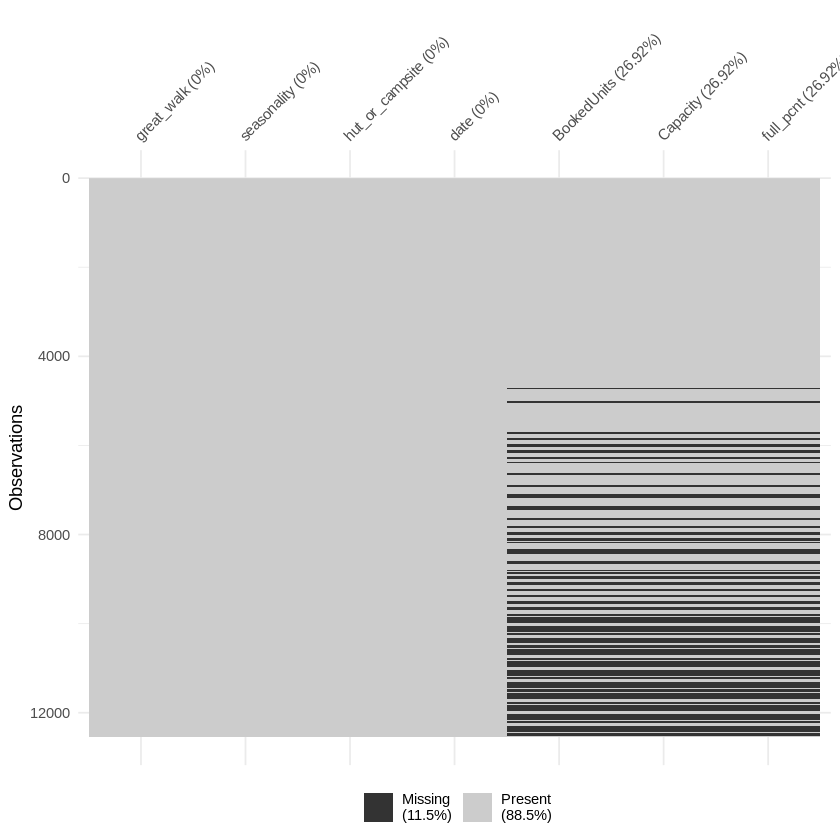

In [5]:
gw_bookings_wide_df <- gw_bookings_df %>%
    spread(key = measure,
           value = count) %>%
    mutate(full_pcnt = BookedUnits / Capacity * 100)
    
# Need to rename BookedUnits and Capacity (probably to total_booked and total_capacity) but I forgor how

gw_bookings_wide_df %>% glimpse()
gw_bookings_wide_df %>% skim()
gw_bookings_wide_df %>% vis_miss()

In [6]:
gw_bookings_wide_df %>%
    filter(
            full_pcnt > 100
            # ,seasonality == "Year-round"
          ) %>%
    group_by(great_walk, hut_or_campsite) %>%
    tally(name="times_overbooked") %>%
    arrange(great_walk, desc(times_overbooked))

great_walk,hut_or_campsite,times_overbooked
<chr>,<chr>,<int>
Kepler Track - Great Walk,Iris Burn Hut,4
Kepler Track - Great Walk,Luxmore Hut,3
Milford Track - Great Walk,Mintaro Hut,20
Milford Track - Great Walk,Clinton Hut,18
Milford Track - Great Walk,Dumpling Hut,16
Routeburn Track - Great Walk,Lake Mackenzie Hut,15
Routeburn Track - Great Walk,Routeburn Falls Hut,2
